Kaggle provides data from the [Titanic dataset](https://www.kaggle.com/c/titanic/data) as a learning competition. The target is to predict whether a person survives.

There are some limitations to the data. For one, it doesn't seem to include all passengers. Also, no crew members are represented.

First, I want to know more about the passengers and their stories. I created a dataframe of all the passenger data included by Kaggle. Note that this doesn't include whether the person survived, as that is witheld in the test data provided. However, we can learn about some characteristics of the passengers.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv('all_titanic_data.csv')
display(df.head())
display(df.info())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


None

In [153]:
df.set_index('PassengerId', inplace=True)

From the [codebook](https://www.kaggle.com/c/titanic/data):

```
SibSp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
```

I see plenty of age data missing from the dataset. I wonder if this should be imputed when I go to model.

In [154]:
df.dropna(subset=['Fare'], inplace=True)
display(sorted(df['Fare'].unique(), key=float))
print(f"Number of unique ticket prices, out of 891 tickets: {len(df['Fare'].unique())}")

[0.0,
 3.1708,
 4.0125,
 5.0,
 6.2375,
 6.4375,
 6.45,
 6.4958,
 6.75,
 6.8583,
 6.95,
 6.975,
 7.0,
 7.0458,
 7.05,
 7.0542,
 7.125,
 7.1417,
 7.225,
 7.2292,
 7.25,
 7.2833,
 7.3125,
 7.4958,
 7.5208,
 7.55,
 7.575,
 7.5792,
 7.6292,
 7.65,
 7.7208,
 7.725,
 7.7292,
 7.7333,
 7.7375,
 7.7417,
 7.75,
 7.775,
 7.7792,
 7.7875,
 7.7958,
 7.8,
 7.8208,
 7.8292,
 7.85,
 7.8542,
 7.875,
 7.8792,
 7.8875,
 7.8958,
 7.925,
 8.0292,
 8.05,
 8.1125,
 8.1375,
 8.1583,
 8.3,
 8.3625,
 8.4042,
 8.4333,
 8.4583,
 8.5167,
 8.6542,
 8.6625,
 8.6833,
 8.7125,
 8.85,
 8.9625,
 9.0,
 9.2167,
 9.225,
 9.325,
 9.35,
 9.475,
 9.4833,
 9.5,
 9.5875,
 9.6875,
 9.825,
 9.8375,
 9.8417,
 9.8458,
 10.1708,
 10.4625,
 10.5,
 10.5167,
 10.7083,
 11.1333,
 11.2417,
 11.5,
 12.0,
 12.1833,
 12.275,
 12.2875,
 12.35,
 12.475,
 12.525,
 12.65,
 12.7375,
 12.875,
 13.0,
 13.4167,
 13.5,
 13.775,
 13.7917,
 13.8583,
 13.8625,
 13.9,
 14.0,
 14.1083,
 14.4,
 14.4542,
 14.4583,
 14.5,
 15.0,
 15.0333,
 15.0458,
 15.05,


Number of unique ticket prices, out of 891 tickets: 281


In [155]:
display(df['Fare'].describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [156]:
df.groupby('Pclass')['Fare'].agg([np.min, np.max, np.mean])

,amin,amax,mean
Pclass,,,
1,0.0,512.3292,87.508992
2,0.0,73.5000,21.179196
3,0.0,69.5500,13.302889


Wait, who was getting free tickets? Especially in first class?

In [157]:
df[df['Fare']==0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


[Mr. Roderick Robert Crispin Chisholm](https://en.wikipedia.org/wiki/Roderick_Chisholm_(engineer)) was traveling on the Titanic to oversee the journey, as he had co-designed the ship with Thomas Andrews, who is also listed. If you look up the ["Guarantee Group"](https://www.encyclopedia-titanica.org/titanic-guarantee-group/) you will see some of the names on this list.

As for [Mr. Joseph Bruce Ismay](https://en.wikipedia.org/wiki/J._Bruce_Ismay#Titanic_controversy), he was chairman of the White Star Line. He was traveling on the Titanic's maiden voyage in that capacity. If you've seen the movie, that's [this guy](https://giphy.com/gifs/titanic-gif-ship-shipping-af34tVk53Li4E)

These men didn't pay for their tickets as they were traveling for work, essentially.

In [158]:
df['Age'].describe()

count    1045.000000
mean       29.851837
std        14.389194
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

The average passenger age is close to 30.

In [159]:
no_age = df[df['Age'].isna()]
display(no_age.head(20))

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


There's plenty of diversity in fields missing age, so that might be safe to impute it during modeling. 

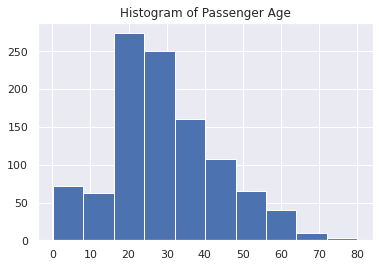

In [160]:
df['Age'].hist()
plt.title('Histogram of Passenger Age')
plt.show()

In [161]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.745000
Name: Age, dtype: float64

In [162]:
df.groupby('Embarked')['Age'].mean()

Embarked
C    32.332170
Q    28.630000
S    29.205186
Name: Age, dtype: float64

Second and third class definitely skew younger than first. The trend isn't as noticeable in port of embarkation, but those who boarded in Cherbourg, France were a bit older.

In [163]:
pd.crosstab(df['Pclass'], df['Embarked'], margins=True, margins_name='Total', normalize='all')

Embarked,C,Q,S,Total
Pclass,,,,
1,0.107963,0.002297,0.135528,0.245789
2,0.021440,0.005360,0.185299,0.212098
3,0.077335,0.086524,0.378254,0.542113
Total,0.206738,0.094181,0.699081,1.000000


Nearly 70% of all passengers embarked at Southampton, England. Of those, 13.5% were first class, 18.5% were second class, and 37.8% of the passengers embarking there were in third class.

54.2% of all passengers traveled in third class.

In [164]:
under18 = df[df['Age']<18]

In [165]:
pd.crosstab(under18['Pclass'], under18['Embarked'], margins=True, margins_name='Total', normalize='all')

Embarked,C,Q,S,Total
Pclass,,,,
1,0.032468,0.000000,0.064935,0.097403
2,0.032468,0.000000,0.181818,0.214286
3,0.136364,0.058442,0.493506,0.688312
Total,0.201299,0.058442,0.740260,1.000000


While 54% of all passengers were in third class, 68.8% of those under 18 were.

In [166]:
df['no_cabin_listed'] = np.where(df['Cabin'].isna(), 1, 0)
pd.crosstab(df['Pclass'], df['no_cabin_listed'], normalize=True, margins=True)

no_cabin_listed,0,1,All
Pclass,,,
1,0.195719,0.051223,0.246942
2,0.017584,0.194190,0.211774
3,0.012232,0.529052,0.541284
All,0.225535,0.774465,1.000000


I'll be interested in seeing if not having a cabin number listed matters in survival rates.

In [167]:
pd.crosstab(df['Pclass'], df['Sex'], normalize=True, margins=True)

Sex,female,male,All
Pclass,,,
1,0.110092,0.136850,0.246942
2,0.081040,0.130734,0.211774
3,0.165138,0.376147,0.541284
All,0.356269,0.643731,1.000000


There were more men than women among Titanic passengers, and much of that disparity was coming from third class.

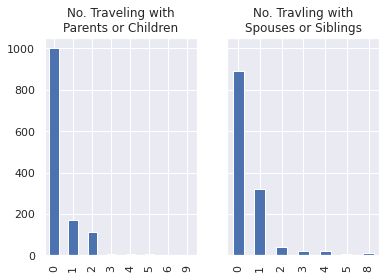

In [168]:
parch = df['Parch'].value_counts().sort_index()
sibsp = df['SibSp'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
parch.plot(ax=ax1, kind='bar')
ax1.set_title('No. Traveling with\nParents or Children')
sibsp.plot(ax=ax2, kind='bar')
ax2.set_title('No. Travling with\nSpouses or Siblings')
plt.show()

Many passengers were traveling alone.

I think at this point it's time to pull in the training dataset so we can explore survival rates.

In [169]:
train = pd.read_csv('train.csv', index_col='PassengerId')

In [170]:
train['no_cabin_listed'] = np.where(train['Cabin'].isna(), 1, 0)
train['traveling_alone'] = np.where(np.logical_and(train['Parch']==0, train['SibSp']==0), 1, 0)
train['under_18'] = np.where(train['Age']<18, 1, 0)

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            204 non-null    object 
 10  Embarked         889 non-null    object 
 11  no_cabin_listed  891 non-null    int64  
 12  traveling_alone  891 non-null    int64  
 13  under_18         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 104.4+ KB


In [172]:
train.pivot_table('Survived', index='Pclass', columns='Embarked', margins=True)

Embarked,C,Q,S,All
Pclass,,,,
1,0.694118,0.500000,0.582677,0.626168
2,0.529412,0.666667,0.463415,0.472826
3,0.378788,0.375000,0.189802,0.242363
All,0.553571,0.389610,0.336957,0.382452


In this subset of the data, 62% of the passengers in first class survived, compared to 24% of those in third class. Those embarking in Cherbourg had the highest survival rates, interestingly.

In [173]:
display(train.pivot_table('Survived', index='Pclass', columns='under_18', margins=True))
display(train.pivot_table('Survived', index='Pclass', columns='Sex', margins=True))

under_18,0,1,All
Pclass,,,
1,0.612745,0.916667,0.629630
2,0.409938,0.913043,0.472826
3,0.217918,0.371795,0.242363
All,0.361183,0.539823,0.383838


Sex,female,male,All
Pclass,,,
1,0.968085,0.368852,0.629630
2,0.921053,0.157407,0.472826
3,0.500000,0.135447,0.242363
All,0.742038,0.188908,0.383838


They did a better job of "women and children first" with to first and second class. Children in first and second class had a 91% survival rate, compared to 37% for children in third. Overall, half (53%) of the children in this subset survived the sinking.

74% of women in this subset of the data survived the sinking, compared to 18.89% of men. 96.8% of the women in first class survived, and 62.9% of the passengers in first class survived.

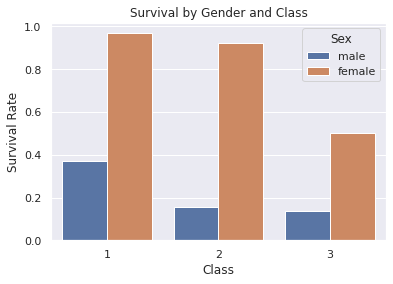

In [174]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ci=None)
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival by Gender and Class')
plt.show()

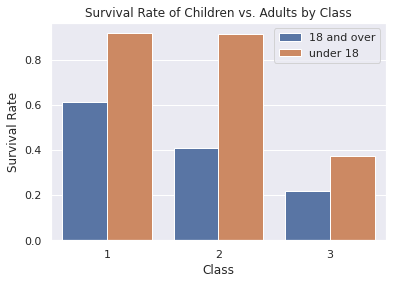

In [175]:
sns.barplot(x='Pclass', y='Survived', hue='under_18', data=train, ci=None)
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate of Children vs. Adults by Class')
plt.legend(['18 and over', 'under 18'])
plt.show()

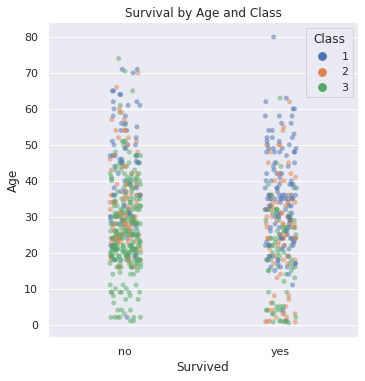

In [176]:
sns.catplot(x='Survived', y='Age', hue='Pclass', data=train, alpha=0.5, legend=False)
plt.xticks([0, 1], labels=['no', 'yes'])
plt.title('Survival by Age and Class')
plt.legend(title='Class')
plt.show()

Overall though, it does appear that being female and being a child increased the odds of survival.

In [177]:
pd.crosstab(train['Survived'], train['no_cabin_listed'])

no_cabin_listed,0,1
Survived,,
0,68,481
1,136,206


In [178]:
pd.crosstab(train['Pclass'], train['no_cabin_listed'], margins=True)

no_cabin_listed,0,1,All
Pclass,,,
1,176,40,216
2,16,168,184
3,12,479,491
All,204,687,891


Good to note that a lot don't have a cabin listed, and dispropotionately so in third class. It will probably be a good variable to remove when it comes time for modeling.

In [179]:
pd.crosstab(train['Survived'], train['traveling_alone'], normalize=True, margins=True)

traveling_alone,0,1,All
Survived,,,
0,0.196409,0.419753,0.616162
1,0.200898,0.182941,0.383838
All,0.397306,0.602694,1.000000


Traveling alone vs. traveling with family did not appear to help one's survival rates (20% vs. 18.3%, respectively).

Before I close this notebook and start modeling, I want to re-focus on the fact that these were real people. Here's a [video](https://www.youtube.com/watch?v=oFOvs_HGoHA) about Margaret Rice, recently widowed, and her 5 children, who embarked at Queenstown, Ireland. We can find them in this dataset.

In [180]:
df[df['Name'].str.contains('Rice')==True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_cabin_listed
PassengerId,,,,,,,,,,,
17,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,1
172,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,1
279,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,1
788,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,1
886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,1
947,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.125,NaN,Q,1


There she is with her five sons, ages 10 to 2: Albert, George, Eric, Arthur, and Eugene. All six of them perished in the sinking. It is important to remember that data like this, like COVID-19 statistics, and others are ultimately about real people.